# Replication Study: Galiani, Rossi, and Schargrodsky (2011) Revisited

Author: Benedikt Heinrich Müller

Course Microeconometrics, Summer term 2020, Prof. Dr. Eisenhauer

M.Sc. in Economics, University of Bonn
***

## Introductory Remarks 

In the following I replicate the findings of the 2011 empirical study "*Conscription and Crime: Evidence from the Argentine Draft Lottery*" by Galiani et al. (for exact citation see [section 1](#1.-Brief-Summary-of-Journal-Acticle)). Throughout I apply the same nomenclatur as did Galiani et al. (2011), i.e. the tables and figures are enumerated as in the original paper. That is to foster comparability. <br>
Galiani et al. (2011) used Stata for their analysis. Since Stata was not available to me, I collected the labels of the variables by means of comparison of the .do-file and the results presented in the paper.

Tables and figures denoted with an **E** are extended tables from the original article, and thus, bear the enumeration as in the original article. **A** denotes the tables and figures from the online appendix. Tables and figures that were not part of the article and were instead constructed by me are denoted by a **B**.

This notebook is structured as follows. [Section 1](#1.-Brief-Summary-of-Journal-Acticle) introduces the data used, the research question, and the research design applied by Galiani et al. (2011). I draw on causal graphs and a potential outcome model to clarify the empirical strategy and potential pitfalls. [Section 2](#2.-Replication-of-Key-Findings) replicates the key tables and figures of the article. Furthermore I replicate some figures from the online appendix. [Section 3](#3.-Extensions) contains my own contribution to the empirical study. [Section 4](#4.-Critical-Assessment-of-Quality) concludes this notebook with a discussion of the quality of the study. To this end, I also draw on my own contribution.

## Content of this Notebook 

1. [Brief Summary of Journal Article](#1.-Brief-Summary-of-Journal-Acticle)

    1.1 [Background & Data](#1.1-Background-&-Data)
    
    1.2 [Empirical Strategy](#1.2-Empirical-Strategy)

2. [Replication of Key Findings](#2.-Replication-of-Key-Findings)

    2.1 [Descriptive Statistics and Pre-Treatment Characteristics](#2.1-Descriptive-Statistics-and-Pre-Treatment-Characteristics)

    2.2 [Main Results](#2.2-Main-Results)
    
    2.3 [Complementary Results](#2.3-Complementary-Results)
    
    2.4 [Online Appendix](#2.4-Online-Appendix)
    
3. [Extensions](#3.-Extensions)

    3.1 [Figures](#3.1-Figures)
    
    3.2 [Extended "Testing" of Exogeneity of Instrument](#3.2-Extended-"Testing"-of-Exogeneity-of-Instrument)
    
    3.3 [Robustness Checks](#3.2-Robustness-Checks)

4. [Critical Assessment of Quality](#4.-Critical-Assessment-of-Quality)

[References](#References)

In [2]:
# Import packages.
import pandas as pd
import statsmodels.api as sm
import numpy as np

from scipy import stats
from linearmodels import IV2SLS
from auxiliary.functions_v6 import *

## 1. Brief Summary of Journal Acticle

In this replication study I draw on the following article:

Galiani, Sebastian, Martín A. Rossi, and Ernesto Schargrodsky. 2011. "Conscription and Crime: Evidence from the Argentine Draft Lottery." *American Economic Journal: Applied Economics*, 3 (2): 119-36.
[DOI: 10.1257/app.3.2.119](http://dx.doi.org/10.1257/app.3.2.119)

Galiani et al. (2011) aim at studying the causal effect of serving in the military on subsequent criminal behaviour. They use administrative data on the Argentine draft lottery and criminal records. Since failing medical examination before being drafted is endogenous, the authors instrument conscription by *draft eligibility*, a variable indicating whether a unit of observation was randomly chosen to join military service. The unit of observation is all individuals of a birth cohort sharing the same last three digits of the national ID.
The authors find that the effect of conscription on developing a criminal record is positive and statistically significant.
The novelty of their analysis is that they mostly draw on data from conscription during peacetime.

### 1.1 Background & Data

Conscription in Argentina has been first introduced in 1902 an has been subject to a draft lottery until the abolishment of mandatory conscription in the 1990s. Galiani et al. (2011) use this random assignment to estimate the causal effect of serving in the military on subsequent criminal behaviour. The core part of the analysis uses data from birth cohorts 1958 to 1962 (= *core cohorts*). I start by presenting the particularities of the Argentine draft lottery.

#### The Argentine Draft Lottery 
The timing of the draft lottery is as follows (see section I of Galiani et al. (2011)).
1. Draft numbers are drawn in a public session. For every combination of the last three numbers of the national ID of all men in the birth cohort there is a draft number drawn which is between 1 and 1,000 drawn.
2. The results of the lottery are publicly announced.
3. Medical examinations of all males in the birth cohort are conducted.
4. The exact cutoff number is publicly announced.
5. Draftees start service the following year.

Draftees start service with 21 years (core cohorts of the analysis). The length of military service is one year for army and air force. In the navy one serves for two years. Draftees were assigned to the different military branches based on their draft number. The lowest numbers of draft eligible men were assigned to the army, the medium numbers to the air force and the highest to the navy. E.g. if the cutoff number was 300, the draft numbers from 300 to 700 were assigned to the army, the numbers from 701 to 840 were assigned to the air force, and the numbers 841 to 1,000 were assigned to the navy.

To avoid confusion, note that in Angrist (1990) an individual was draft eligible if he had a number *smaller* than the cutoff. In the Argentine draft lottery the draft number needed to be *higher* than the cutoff.

The draft age was changed from 18 to 21 in 1955. Thus, the cohorts of 1956 and 1957 were not drafted into the military. Data on draft numbers are available for the cohorts from 1929 to 1965. Later the system of the lottery changed, to the effect that Galinai et al. (2011) could no longer determine which draft numbers were draft eligible. The cohort of 1976 was of particular interest since this cohort was not drafted at all due to the abolishment of conscription in Argentina. This fact is later used to strengthen the plausibility of the assumptions imposed on the instrument.

Deferment of military service was possible, but draft eligible status did not change and the individual was still in the cohort-ID group of the initial draft lottery. Some individuals did not need to join military service: "Clerics, seminarians, novitiates, and any individual with family members dependent upon him for support were exempted from military service." (Galiani et al. 2011, p. 122).

#### War and Peace 
The novelty of the study by Galiani et al. (2011) is that they not only estimate the effects of conspcription in wartime but also in peacetime. This is important out of two reasons: 1. the effects of conscription may differ based on whether one served during war or peace and 2. peacetime service is generally more common than wartime service.

1. The effect of serving in the military may be quite different when exposed to actual combat. Those individuals envolved in combat may suffer from detrimental effects on their mental and physical health. These conditions may have a large impact on their subsequent criminal behaviour after serving in the military and may also diminish labour market outcomes.

2. Conscription during peacetime is more often the case than conscription during wartime. Galiani et al. note that most countries in the world have citizens drafted into the military during peacetime. Thus, the effect of serving in the military in peacetime is the more relevant case when evaluating this policy.

From April to June 1982 there was the *Falklands War* between Argentina and the United Kingdom. The cohorts of 1962 and 1963 served during this war. Because of data availability, the authors considered the cohorts from 1958 to 1962 for their main analysis.

#### Data & Important Variables 

Galiani et al. use data provided by various Argentine administrative records.
Because of data privacy issues, they do not provide the raw data of their analysis. One observation in the data set stands for all individuals in the same birth cohort *c* and share the same last three digits of the national ID *i*.


In the following, I describe the most important variables used in the analysis.
The measure of criminal behaviour is the variable *crime rate*, which is also the dependent variable.
Let *n* be the number of individuals *j* in birth cohort *c* which share the same last three digits of their national ID *i*. Further, let $I(j)$ be an identity function returning *1* if individual *j* has a criminal record and *0* otherwise. Then, *crime rate* is defined as
$$crimerate=\frac{ \sum_{j=1}^n I(j)}{n}$$
Note, that $I(j)$ does not indicate which kind of or how many crimes individual *j* committed. <br>
The authors want to isolate the effect of *conscription*, represented in the data set by *'sm'* (probably from Spanish *servicio militar*). *Conscription* is the share of individuals in *c* and *i* who served in the military. *Conscription* is probably endogenous and therefore instrumented for.
The potential instrument is the variable *draft eligible*, denoted in the data set by the dummy *'highnumber'*, which returns *1* if the draft number of *c* and *i* is above the cutoff number. The variable *draft number* is also available.
Potential control variables used are birth-cohort, origin (*argentine*, *naturalized*, and *indigenous*), and province dummies (federal states). The latter are denoted *dist* plus a number indicating one of the 24 provinces. The varible *malvinas* (Spanish name of the Falkland Islands) denotes the share of individuals of cohort *c* and ID *i* that served during the *Falklands War* in 1982 (for the main analysis only cohort 1962 served during the war). *malvinas* is interacted with *draft eligible* for the analysis.

Crime rates distinguished by type of crime were collected during the period 2000 to 2005. Again, crime rates are calculated for each cohort-ID group for the cohorts of 1958 to 1962. According to footnote 13 in Galiani et al. (2011) types of crime are only reported for 37 percent of the cases. They state that draft number was not correlated with the types of crime missing. Out of confidentiality reasons they do not provide the raw data.

The authors consider labour market outcomes as well. Unemployment and income data are computed by using self-declared occupation from the national ballot registry of 2003. Based on the occupation, they assign unemployment shares and average hourly earnings by using official household survey data from May 2003. Participation rates in the formal labour market is retrieved from the national social security data base. Thus, the labour market outcomes are observed 19 to 26 years after military service.

### 1.2 Empirical Strategy

### Causal Graph Representation 

I start the discussion of the empirical strategy by presenting the causal relationship Galiani et al. (2011) assumed in their study. To this end, I use the graphical representation suggested by Pearl (2014).
Causal graphs were created with [dagitty.net](http://www.dagitty.net/). The following notation is used.
- Edges show the assumed causal relationship.
- Arrows indicate the direction of the causal relationship.
- Red edges indicate threats to identification.
- Blue nodes are observed variables, grey ones are unobserved.
- Red nodes denote compromised instruments.
- The outcome variable is denoted by an **I** in a blue node.
- The variable whose effect we want to study is denoted by a triangle in a green node.

#### Causal Graph 1 - Simple Case
<img src='files/dagitty-model_v2.png' alt="Alt text that describes the graphic" title="Causal Graph 1" />

Galiani et al. (2011) want to estimate the effect of conscription on crime rates. The fundamental problem of this endeavour is that the variable *conscription* might be correlated with the error term of *crime rate*. This is, because *crime rate* and *conscription* could both be influenced by third variables. For example, the socioeconomic background could influence whether an individual fails the medical examination and thus, influences military service, but socioeconomic background is very likely to shape criminal behaviour. Back-door identification identifies the causal effect of *conscription* on *crime rate* by blocking all back-door paths. According to Winship and Morgan (2007), a back-door path is a path from *conscription* to *crime rate* that starts with a directed edge that points to *conscription*.
There is one back-door path in causal graph 1: *conscription* <- *U* -> *crime rate*. Since *U* is a set of variables that are unobserved, we cannot close this back-door path by adjusting for it. We end up in a state where selection on unobservables is an issue. Selection on unobservables occurs if treatment effect heterogeneity and self-selection are present.

If we instrument *conscription* by the exogenous *draft number*, given the causal relationship implied by causal graph 1, we can isolate the effect of *conscription* on *crime rate*. Exogeneity of *draft number* implies that there is no relationship between *draft number* and *crime rate* other than through *conscription*. In the language of causal graphs this amounts to blocking all back-door paths from *draft number* to *crime rate*. Since there are no back-door paths between those, we can estimate the causal effect of *conscription*.

Since lacking data on labour market experience, Galiani et al. (2011) can estimate the overall-effect of conscription only; they cannot adjust for labour market experience. But since they are mainly interested in the overall effect, this is not a drawback as long as causality is as depicted by causal graph 1.

#### Causal Graph 2 - Compromised Instrument: Violation of the Exogeneity Assumption
<img src='files/dagitty-model(1)_v2.png' alt="Alt text that describes the graphic" title="Causal Graph 2" />

Causal graph 2 differs from the first one, by introducing a relationship between *draft number* and *labour market experience*. The causal effect of *conscription* can now no longer be isolated, since the exogeneity of the instrument is compromised. This possible relationship was proposed by Rosenzweig and Wolpin (2000). They applied their criticism on the Vietnam draft lottery and the article by Angrist (1990). *draft number* could influence *labour market experience* by other channels than just through *conscription*, if individuals with a high probability of being drafted face worse labour market conditions. Employers could hesitate from employing someone who is likely to be drafted into the military and would then no longer be available for the job at hand. Whether this criticism is applicable in the case of the Argentine draft lottery, see [section 4](#4.-Critical-Assessment-of-Quality).

#### Causal Graph 3 - More Complex Relationship
<img src='files/dagitty-model(2)_v2.png' alt="Alt text that describes the graphic" title="Causal Graph 3" />

Causal graph 3 introduces the effect of wartime conscription. Wartime military service could have other detrimental effects than peacetime military service. For example, experience of combat could cause mental disorders that have an effect on criminal behaviour. There is a second channel through which mental disorders could influence criminal behaviour. Individuals suffering from mental disorder have probably less success in the labour market than mentally healthy individuals. Since *mental disorder* as well as *labour market experience* are both unobserved, one could not hope to isolate the effect of wartime military service if the underlying causal relationship is as assumend by causal graph 3. *military service* influences *labour market experience* by itself but also through *mental disorders*. Thus, the effect of wartime military service cannot be isolated.

Due to restrictions on data availability, Galiani et al. (2011) do not use the instrumental variable (henceforth IV) approach to identify the effect of wartime conscription. So, they never really estimate the causal relationship implied by causal graph 3. For a discussion of this, see the discussion of [table 5](#Table-5---Estimated-Impact-of-Conscription-on-Crime-Rates-for-Peacetime-versus-Wartime-Service-and-1-Year-versus-2-Year-Service).
The directed edge between *U* and *mental disorders* is no threat to isolating the causal effect of military service since this path is no longer existent by instrumenting *military service*.

### Empirical Specification

In the following, potential issues concerning the identification of the causal relationship and its crucial assumptions are discussed.

Galina et al. (2011) want to study the effect of serving in the military on subsequent criminal behaviour. They want to estimate the following regression (p.127). Note that the notation presented here does not coincide with the one presented in the article. I adopt the notation used by Winship and Morgan (2007): $$Y_{ci} = \alpha + \delta D_{ci} + \gamma_{c} + \epsilon_{ci}$$
where
- $Y_{ci}$ denotes *crime rate*,
- $D$, denotes *conscription*,
- $\delta$, is the ATE,
- $\gamma_{c}$, a cohort effect, and
- $\epsilon_{ci}$, an error term.

Formally this amounts to  the following:
$$E[Y_{ci}] = E[\alpha + \delta D_{ci} + \gamma_{c} + \epsilon_{ci}]$$

If the assumption $E[\epsilon∣D]=0$ holds, that is the variable of interest is independent of the outcome variable, we can successfully identify the causal effect of $D$ on $Y$ as the average treatment effect.
But, in the above described setting (see causal graph) it is possible that being actually drafted into the military is subject to some form of selection. Recall that all individuals in birth cohort *c* needed to attend medical examinations.
Failing the medical examination could be correlated with the socioeconomic background an individual has. For example, health and socioeconomic status could be associated. On the other hand, individuals with a high draft number, i.e. with a high probability of being drafted into the military, fail the medical examinations by purpose and are not drafted into the military. One could imagine that financially better off individuals are more able to do so than individuals from other socioeconomic backgrounds. This renders *conscription* endogeneous.

Hence, we cannot ensure that $E[\epsilon∣D]=0$.
This endogeneity issue can be partially overcome by using an IV approach. A valid instrument needs to necessarily fulfil the following two conditions (this specification applies for the case of a binary instrument):
1. Exogeneity: $E[\epsilon∣Z]=0$
2. Relevance: $E[Z∣D]\neq 0$

After some manipulation we arrive at the Wald estimator
$$\hat{\delta}_{IV, Wald} = \frac{E[Y|Z=1]-E[Y∣Z=0]}{E[D|Z=1]-E[D|Z=0]}$$

The exogeneity condition cannot be tested statistically. One can only argue whether an instrument is uncorrelated to the error $\epsilon$. Condition 2 can be tested by means of estimating the effect of the instrument on the endogenous independent variable $D$. The effect needs to be large and statistically significant. Otherwise we would end up with a weak instrument, which would render the IV estimator non-applicable.

In what follows, I employ the Potential Outcome framework as presented in Winship and Morgan (2007, pp. 78) in order to clarify the empirical stragtegy the paper is based upon.

#### Potential Outcome framework & LATE.

Consider the potential outcome model presented by Winship and Morgan (2007, pp. 200):
$$Y = Y^0 + (Y^1 − Y^0)D$$
Let $\delta = Y^1 − Y^0$, then
$$Y = Y^0 + \delta D$$
$$Y = E[Y^0] + \delta D + Y^0−E[Y^0]$$

Imbens and Angrist (1994) defined variables indicating potential treatment assignment conditional on the instrument $D^{Z=z}$. These summarise all possible behavioural responses to the instrument and allow the definition of a latent variable $C$. The following is taken from Winship and Morgan (2007, p. 201):

- Compliers $(C=c)$: $D^{Z=0}=0$ and $D^{Z=1}=1$
- Defiers $(C=d)$: $D^{Z=0}=1$ and $D^{Z=1}=0$
- Always takers $(C=a)$: $D^{Z=0}=1$ and $D^{Z=1}=1$
- Never takers $(C=n)$: $D^{Z=0}=0$ and $D^{Z=1}=0$

*Compliers* react to being exposed to the instrument by selecting into the treatment. *Always takers* select into treatment irrespective of the instrument; vice versa, *Never takers* never do so. *Defiers* would have selected into the treatment if not exposed to the instrument, but do not do so if exposed to the instrument. Being exposed to the instrument means $Z=1$ for the individual.

Following Winship and Morgan (2007, p. 201), $D$ can be defined as:
$$D = D^{Z=0} + (D^{Z=1} − D^{Z=0})Z$$
Let $\kappa = D^{Z=1} − D^{Z=0}$, then
$$D = D^{Z=0} + \kappa Z$$

$\kappa$ represents the causal effect of $Z$ on $D$. If $D$ varies for the individuals, so does $\kappa$.

Additionally to the analogous identifying conditions defined above, we have a third condition. Monotonicity requires that $\kappa ≥ 0$ for all i or $\kappa ≤ 0$ for all i.

In the light of essential individual heterogeneity, the IV results cannot be interpreted as an ATE, i.e. $\delta$ is not constant in the population. This is the case, since we can only make statements about the causal relationship of individuals whose probability of treatment changes according to the IV. In the empirical investigation at hand this means that the estimated effect is the effect on the compliers only, i.e. the individuals who join the military because they are coerced to do so by having a draft number higher than the cutoff. That is, the Wald estimator in this context converges in probabilty to $E[\delta |C=c]$ (Winship and Morgan 2007, p. 202).

This treatment affect is denoted the *Local Average Tretament Effect* (LATE), introduced by Angrist and Imbens (1994). The additional condition of monotonicity implies that there are either compliers or defiers in the sample, but not both. In the problem at hand this amounts to assuming that there are no draft-lottery defiers in the sample. A draft-lottery defier is a person that would have served voluntarily, i.e. if he wasn't assigned a draft number above the cutoff, but abstains from military service if he got a draft number above the cutoff. To avoid military service, if one was assigned a number above the cutoff, it is necessary to fail the medical examination, what might come with some effort. Moreover, defying would imply irrational behaviour.
Thus, one can argue that there are no defiers in the sample, i.e. people who had served if service was voluntary, but who did not if they were drafted.
Moreover, the treatment effect of the analysis is only provided for the draft-lottery compliers, since, given monotonicity, only these are the ones having an impact on the estimates of the effect on crime rates. Recall that treatment status did not change for *Never takers* and *always takers*. Thus, all the variation in estimating the causal effect in an IV setting is due to compliers (Winship and Morgan 2007, p. 203).
Thus, $\delta$ is not constant.

## 2. Replication of Key Findings

Data preprocessing & load core data set 'df'.

In [3]:
constant, highnumber, conscription, crimerate, malvinas, navy, origin, cohorts, districts, hn_malvinas, df = get_variables()

### 2.1 Descriptive Statistics and Pre-Treatment Characteristics

### Table B.1 - Descriptive Statistics

Since table 1 of the paper provides merely an overview over the dat set used, I do not replicate table 1 but present the variables in more detail.

Table B.1 contains some descriptive statistics. Column 1 was calculated by (mean of variable of interest) x (mean cohort size).

The mean of *conscription* for the cohorts of 1958 to 1962 is 0.5031. This means that more than 50 percent of the male cohorts of 1958 to 1962 served in the military. Since the average size of a cohort is 236,656, this amounts to a total of 119,067 individuals of cohort c on average who served in the military. This underlines the importance of the study at hand. Since half of each male cohort served in the military the impact of military service on total number of crimes committed could be quite large.

There are only about 4 percent always takers in the data set, given that there are no defiers.

In [4]:
table_B_1()

Table B.1 - Descriptive Statistics of Selected Variables of Interest for Male Birth Cohorts 1958 to 1962
______________________________________________________________________________________________________________
                           (1)             (2)             (3)             (4)             (5)
                 Cohort size*Mean            Mean        St. dev.   Mean eligible     Mean exempt
______________________________________________________________________________________________________________
Variables: 

['highnumber']          165612          0.6998          0.4584          1.0000          0.0000   

['sm']                  119067          0.5031          0.3049          0.7002          0.0437   

['crimerate']            16392          0.0693          0.0178          0.0698          0.0681   

['formal']               80158          0.3387          0.0470          0.3371          0.3424   

['unemployment']         42537          0.1797          0.0543         

### Table 2 - Differences in Pre-Treatment Characteristics by Birth Cohort and Eligibility Group

Table 2 reports characteristics that were not determined by the treatment.
The results of the t-tests show that samples are balanced before the treatment, i.e. draft exempt and draft eligible individuals do not differ according to their origin (not-indigenous argentine, indigenous argentine, or naturalized citizens).
Galiani et al. (2011) used the following assumptions regarding the t-test:
- Samples drawn independently from population.
- Variances are allowed to differ across draft eligible and draft exempt groups.

I apply the same set-up for the t-test. Nonetheless, my results differ in magnitude. Where the authors' test statistics are all quasi zero, mine are different from zero. The most important result is though, that we cannot reject the null hypothesis of equal means. That is, pre-treatment origin is balanced across the draft eligible and draft exempt group. This can be seen by considering the p-values, that are all way above the conventional level of at least 10 percent.

Note that table 2 in Galiani et al. (2011) shows standard errors, where the table presented here shows the p-values directly.

In [5]:
table_2()

Table 2 - Differences in Pre-Treatment Characteristics by Birth Cohort and Eligibility Group
Differences by Cohort (draft exempt - draft eligible)
______________________________________________________________________________________________________________
Cohort                                 1958            1959            1960            1961            1962   

______________________________________________________________________________________________________________
Argentine-born, not indigenous     -0.07953        -0.13760        -1.05497        -0.18741         0.26607   

                                    0.93667         0.89060         0.29183         0.85140         0.79028   

Argentine-born, indigenous         -0.14981        -0.15394         0.71760        -0.47173         0.64254   

                                    0.88104         0.87771         0.47327         0.63726         0.52077   

Born abroad, naturalized            0.70539         0.15141         0.9

### Table 3 - First Stage by Birth Cohort 

Table 3 presents first stage regression results, that is, the endogenous variable is regressed on the instrument. Regression estimates of *draft eligible* are highly significant, indicating a strong instrument. All point estimates of draft eligible are well above 0.6. This implies that the probability of serving in the military was more than 60 percent larger for individuals with a draft number above the cutoff compared to the individuals with a draft number below the cutoff. Thus, we can rule out problems that arise due to a weak instrument.

Note that some of my findings differ slightly from the ones presented in the paper. The point estimate for the constant in the paper is 0.0421 with a standard error of 0.0008. The significance level does not change and also the point estimate for draft eligible is the same. This is the Stata code by Galiani et al. (2011):
> areg sm highnumber if cohort > 1957 & cohort < 1963, robust absorb(cohort)

I absorb the cohorts by including cohort dummies directly in the OLS regression. I included n-1 of the cohort dummies in order to avoid multicollinearity.

In [6]:
table_3()

Table 3 - First Stage by Birth Cohort
Dependent Variable: Conscription
________________________________________________________________________________________________________________
Cohort             1958-1962            1958            1959            1960            1961            1962                   
                         (1)             (2)             (3)             (4)             (5)             (6)                   
________________________________________________________________________________________________________________
Draft Eligible        0.6587***       0.6279***       0.6210***       0.6505***       0.6972***       0.6853***

                      0.0012          0.0033          0.0027          0.0018          0.0017          0.0019   

Constant              0.0323***       0.0578***       0.0389***       0.0377***       0.0556***       0.0343***

                      0.0017          0.0030          0.0008          0.0008          0.0011          0.0007

### 2.2 Main Results 

In the following I present the main results of the empirical study. The following results are key since they deocument the statistically significant relationship between crime rates and military service.

### Table 4 - Estimated Impact of Conscription on Crime Rates 

For table 4 I can replicate the same figures as the authors did. There are some differences, though, that can be attributed to rounding. Percent changes for columns 1, 2, 4, 6, and 7 differ by 0.01 to 0.02 percentage points. Point estimates and standard errors do not differ.
The results in columns 1, 2 and 5 to 7 are results from intention-to-treat regressions. The outcome of interest is directly regressed on the instrument. This means that we also consider individuals who were draft eligible but did not actually serve in the military. We do not get the causal effect of military service on crime rates.

Thus, the key columns are columns 3 and 4 which identify the average treatment effect of serving in the military on crime rates for compliers. The effect is independet of including origin and province dummies. Due to the randomisation in draft eligibility this can be expected. The effect is small but statistically siginficant at the 1 percent level. The percent change associated with the coefficients of Two-Stage Least Squares (2SLS) including controls is 3.97. This means that the probability of a complier man developing a criminal record increases by 3.97 percent due to serving in the military, on average.

The OLS percent change in crime rates due to *conscription* in the online appendix is 3.32. Given we successfully identified the causal effect of conscription through the IV approach, OLS results are biased downwards. The difference is 0.65 percentage points. The direction of bias supports the argument that individuals that on average more often commit crime had a larger propensity of being able to avoid military service. This does make sense if we assume that people who take criminal measures to avoid being drafted are also more likely to commit crimes later in life. Note, that we are observing crimes committed in the adult justice system only.

In [7]:
table_4(df=df)

Table 4 - Estimated Impact of Conscription on Crime Rates 
________________________________________________________________________________________________________________________________
Cohort             1958-1962       1958-1962       1958-1962       1958-1962       1929-1965       1929-1955       1958-1965                
                         (1)             (2)             (3)             (4)             (5)             (6)             (7)                
________________________________________________________________________________________________________________________________
Draft Eligible        0.0018***       0.0018***                                       0.0006**        0.0003          0.0012***

                      0.0006          0.0006                                          0.0003          0.0004          0.0004   

Conscription                                          0.0027***       0.0027***                                                

              

### Table 5 - Estimated Impact of Conscription on Crime Rates for Peacetime versus Wartime Service and 1-Year versus 2-Year Service

Table 5 presents intention-to-treat regression results of eligibility for service in the navy and the impact of the Falklands War. Columns 1 and 3 conduct the analysis for cohorts 1929 to 1965, whereas columns 2 and 4 use cohorts 1958 to 1965.
I was able to replicate their results. But there are differences in the significance level. In the original paper *draft eligible* was statistically significant at the 10 percent level in column 1 and significant at the 5 percent level in column 3. The coefficient on draft eligible in column 1 is 0.00001 larger than in the original paper.

There is an error in the do.-file provided.
> areg crimerate highnumber navy if cohort > 1956 & cohort < 1966, absorb(cohort) robust

So, they do the analysis for the cohort 195**7** to 1965, although they state that the cohort of 1957 was not drafted at all. The above figures do not differ from the one's presented in table 5 column 4. This is probably due to the handling of NaNs. If rows containing NaNs are dropped in Stata then the rows satisfying cohort==1957 are dropped entirely, since they have NaNs for *highnumber*. That is why the number of observations does not change either.

As Galiani et al. (2011) state on p. 131, from the 202,500 men from cohorts 1962 and 1963 doing military service, only about 12,500 fought in the Falklands War. The coefficient on *navy* is positive and statistically significant.
Galiani et al. (2011) use the latter finding to strengthen their hypothesis that military service increases crime rates through forgone labour market experience. The implicit assumption of this interpretation is that navy service has essentially the same impact on crime rates as service in the air force and the army, except for duration. Recall that service in the navy is two years instead of one year compared to army and air force. This assumption may not hold. The relationship between navy service and crime rates could be due to other differences as well. 

I thought of extending their analysis by including a dummy for air force or army eligibility. However, this data was not provided by the authors. *navy* is just a dummy indicating whether a cohort-ID-group was eligible for service in the navy or not.

In [8]:
table_5()

Table 5 - Estimated Impact of Conscription on Crime Rates for Peacetime
versus Wartime Service and 1-Year versus 2-Year Service
________________________________________________________________________________
Cohort             1929-1965       1958-1965       1929-1965       1958-1965                
                         (1)             (2)             (3)             (4)
________________________________________________________________________________
Draft Eligible       0.00048         0.00088*        0.00054*        0.00098** 

                      0.0003          0.0005          0.0003          0.0004   

War Eligible          0.0015*         0.0011                                   

                      0.0009          0.0010                                   

Navy Eligible                                         0.0007**        0.0011*  

                                                      0.0003          0.0006   

Observations           34904            7928          

### 2.3 Complementary Results

Galiani et al. (2011) extend their analysis by shedding light on the channel of labour market experience as a driver of higher crime rates for draftees.

### Table 6 - Estimated Impact of Conscription on Crime rates, by Type of Crime

The authors use data on types of crime at the cohort-ID level to analyse the effect of military service on types of crime and present the results in table 6. Recall that data on types of crime were collected for the period 2000 to 2005. Thus, the long-term effects of conscription on criminal behaviour is assessed.
I was not able to replicate the same percent changes as the authors. They differ quite drastically. Point estimates and standard errors coincide exactly.

The authors interpret the statistically significant coefficients in column 2 and 7 as further support for their channel of interest. They argue that individuals who can accumulate less labour market experience due to military service have a harder time to get a job that satisfies their needs. Therefore they commit "white collar" and "property" crimes that yield materialistic gains.
A counterargument would be that drug trafficking yields also money. The effect, though, is not statistically significant.

Interestingly, the coefficient on *conscription* associated with crimes that involve use of weapons is not statistically significant. There could exist a channel through which crime rates are increased by combat training during military service that involves training in the usage of weapons. Individuals who have served may be more inclined to use weapons since they received training. This hypothesis is not supported by the rsults in column 1 of table 6.

In [9]:
table_6()

Table 6 - Estimated Impact of Conscription on Crime rates, by Type of Crime
________________________________________________________________________________________________________________________________
Dependent Var.       Weapons        Property   Sexual Attack          Murder          Threat     Drug Traff.    White Collar                
Cohort             1958-1962       1958-1962       1958-1962       1958-1962       1958-1962       1958-1962       1958-1962                
                         (1)             (2)             (3)             (4)             (5)             (6)             (7)                
________________________________________________________________________________________________________________________________
Conscription         0.00013         0.00082**       0.00013        -0.00007         0.00022        -0.00009         0.00064***

                     0.00011         0.00034         0.00009         0.00010         0.00014         0.00014      

### Table 7 - Estimated Impact of Conscription on Labour Merket Outcomes

Table 7 does not coincide with table 7 from the article, since I omitted the OLS intention-to-treat estimates from replication. The table shows 2SLS estimates of the effect of conscription on labour market outcomes, 19 to 26 years after the cohorts participated in military service. They are not statistically significant at any conventional level. This finding is in contrast to the findings in table 6. Although labour market outcomes are no longer significantly different for individuals who served and individuals who did not, the effect on crime rates is still significant for some types of crime. Both types of crime and labour market outcomes were retrieved during roughly the same period. Labour market outcomes were observed for 2003/2004 and the crimes from types of crime were committed in the period 2000 to 2005.

This points in the direction that effects of military service on criminal behaviour are longer lasting than the effects on labour market outcomes. There are two caveats of this finding. For the cohorts 1958 to 196**5** the authors find statistically significant effects on earnings and participation rates in the formal labour market (all small and negative), but not for the cohorts 1958 to 1962. This effect could be due to the detrimental effects of wartime military service, since cohorts of 1962 and 1963 served in the Falklands War. This cannot be tested by an IV approach since tretament status is not available for the participants of the Falklands War. The second caveat is that the authors' measures of labour market outcomes could be very noisy (see section 1.1).

In [10]:
table_7_IV()

Table 7 - Estimated Impact of Conscription on Labour Market Outcomes
_______________________________________________________________________________________________
Dependent Var. Formal job market   Unemployment rate            Earnings                    
_______________________________________________________________________________________________
                       1958-1962           1958-1962           1958-1962                    
                             (1)                 (2)                 (3)                    
_______________________________________________________________________________________________
Conscription            -0.00222             0.00078            -0.01688   

                          0.0022              0.0009              0.0106   

Percent change             -0.65                0.41               -0.53   

Observations                5000                5000                5000   

                            2SLS                2SLS    

### 2.4 Online Appendix

From the online appendix I replicate the failure rates of medical examination and the relationship between the conditional probability of serving in the military and the draft lottery numbers. Both are done for the core cohorts of the analysis 1958-1962. They are interesting since they show the behavioural response to the varying probability of being drafted into the military.

In [11]:
years = list(range(1958, 1963, 1))

#### Figure A.1 Failure rates of Medical Examination as a Function of Lottery Draft Number by Cohort

Figure A.1 documents an interesting pattern. Recall that for the cohorts 1957 and 1958 mandatory military service was suspended. In the first panel of figure A.1 for the cohort of 1958 there is no clear pattern of failure rates. They are quite high for the entire sample. Only for the cohort of 1960 another pattern arises. Now failure rates increase until the proximity of the cutoff and stay on the former high level ever after. One could interpret these patterns as learning. In 1958 all individuals failed the medical examination by purpose. Only the later cohorts learn that individuals with low draft numbers do not need to put any effort into failing medical examination to avoid military service.

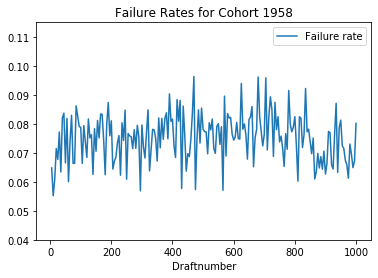

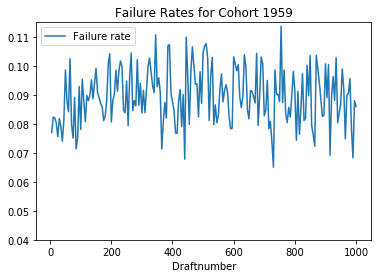

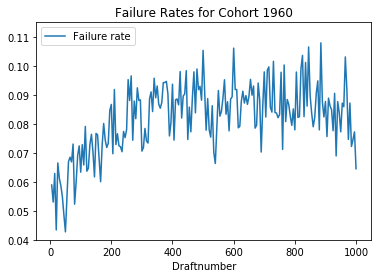

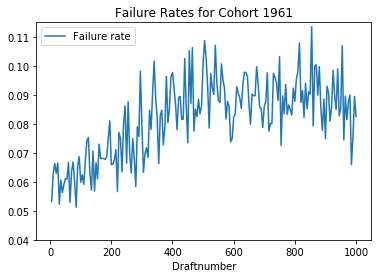

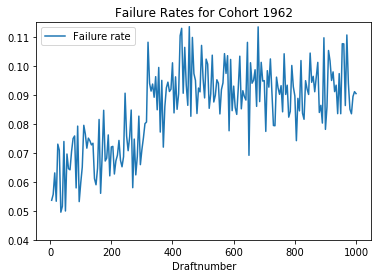

In [12]:
binned_plot(df=df, bin_num=200, ylim=[0.04, 0.115], years = list(range(1958, 1963, 1)))

#### Figure A.2 The Relation Between the Conditional Probability of Serving in the Military and Draft Lottery Numbers by Cohorts

In figure A.2 rates of military service conditional on the draft number are presented. It is apparent that, although some volunteer for the military, most do not. Conscription rates increase abruptly at the cutoff numbers. Although this figure is not key it serves as further evidence of the effect of draft eligible on military service, i.e the relevance of the instrument. This further supports that *draft eligible* is a strong instrument for military service.

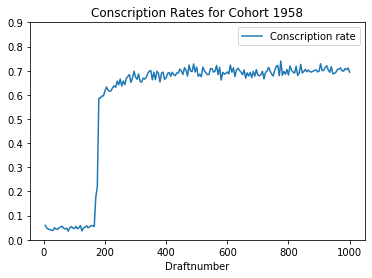

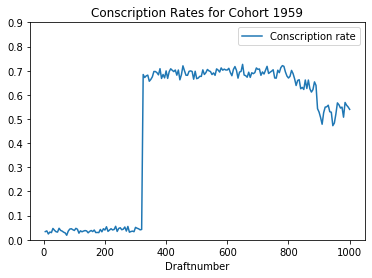

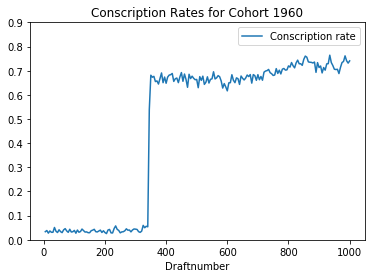

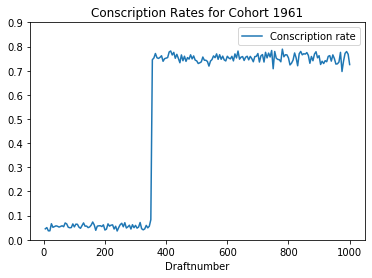

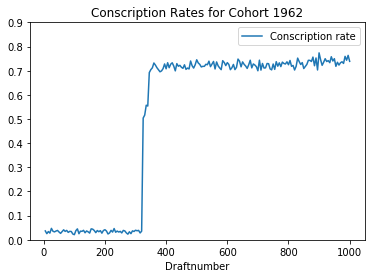

In [13]:
figure_A_2(df=df, bin_num=200, ylim=[0, 0.9], years = list(range(1958, 1963, 1)))

## 3. Extensions 

Local IV would have been an appealing extension to this model. Unfortunately this is possible only if one observes the strength of the instrument on selecting into the treatment. This is not the case here. The instrument *Draft Eligible* is a dummy variable, thus there is no way of getting a measure of how large the incentives are to actually selecting into the treatment.

### 3.1 Figures

#### Figure B.1 The Relation Between Crime Rates and Draft Eligibility by Cohorts

Figure B.1 documents crime rates for draft exempt (on the left) and draft eligible groups (on the right). There are some data points that could be outliers and thus compromise the results of the analysis. There is no clear pattern in the data by mere eye-balling, though.

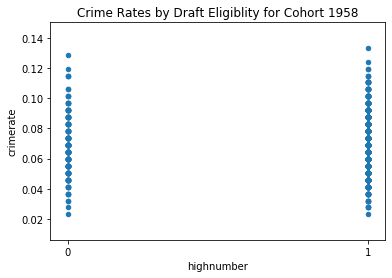

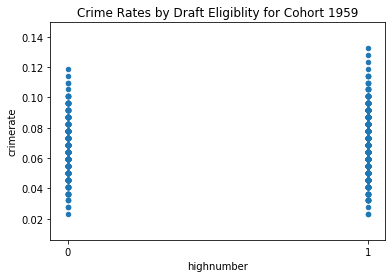

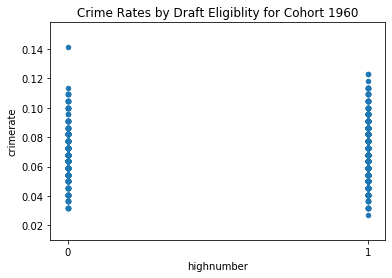

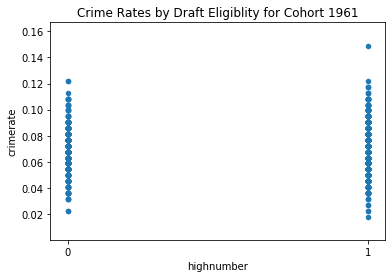

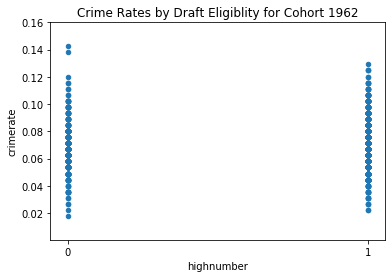

In [14]:
for i in years:
    df[df.cohort == i].plot.scatter(x='highnumber', y='crimerate', title=f'Crime Rates by Draft Eligiblity for Cohort {i}', xticks=(0, 1))

#### Figure B.2 The Relation Between Crime Rates and Conscription Rates by Cohorts

Figure B.2 presents the relationship between crime rates and conscription shares. Clusters on the left are the ones with a draft number below the cutoff, whereas clusters on the right represent ID-groups with draft numbers above the cutoff. As in the figures above there are no apparent relationships from mere eye-balling.

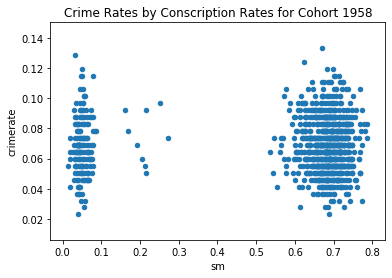

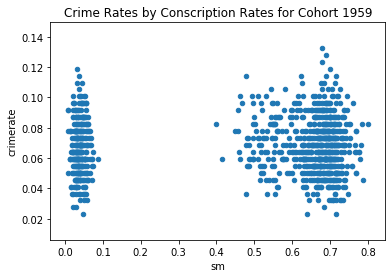

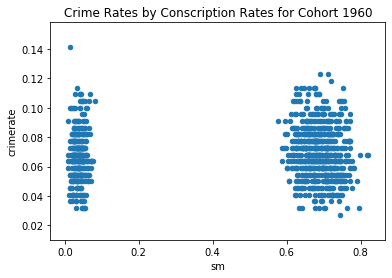

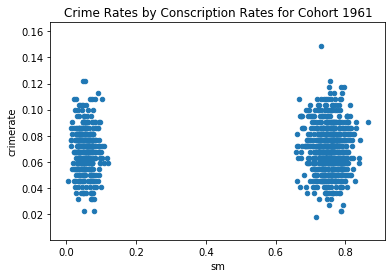

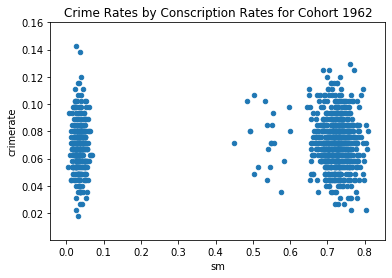

In [15]:
for i in years:
    df[df.cohort == i].plot.scatter(x='sm', y='crimerate', title=f'Crime Rates by Conscription Rates for Cohort {i}')

### 3.2 Extended "Testing" of Exogeneity of Instrument

Galinani et al. (2011) provide suggestive evidence of the plausibility of the exclusion restriction of the instrument *draft eligible*. Of course there are no statistical tests that really test the exogeneity of the instrument. They present some evidence that further supports the claim of exogeneity of the instrument.

#### 3.2.1 Core cohorts: 1958 - 1962

Galiani et al. (2011) use the draft-exempt ID groups for each core cohort, i.e. they take only the observations with a draft number below the true cutoff. Then they create fake cutoff numbers, assigning each of the ID groups below the true cutoff to fake control and fake treatment groups based on the fake cutoff number. They test whether crime rates differ among the two fake control and fake treatment group.

For the fake cutoff number they use the median of the numbers below the cutoff. Galiani et al. (2011) do not include the results of their tests neither in the paper nor the online appendix.
I extend the analysis by varying the fake cutoff number.

Table B.2 reports t-test statistics for each cohort an different deciles used for generating the fake cutoff number. The fake cutoffs are computed as follows. Only draft exempt groups are considered, i.e. only cohort-ID groups below the real cutoff number. For these draft exempt groups a fake cutoff is generated. T-test compare the means in crime rates for the cohort-ID groups below and above the decile. Galiani et al. (2011) used the median only. Thus, their results are shown in decile 0.5, since they used the median. Using the median is an arbitrary choice. I extended their analysis by considering a grid of deciles.

For the median, there are no statistically significant differences in crime rates. For cohort 1959 though, there are significant differences in crime rates for deciles 0.1 and 0.2. For cohort 1961 there is one significant difference for decile 0.3. Significant results though, share not the same sign. In general, there is no clear pattern in the direction of the difference.

Individuals with higher draft numbers have a higher probability of being drafted. Cutoff numbers were announced only after the medical examination. Thus, the lack of a clear pattern of differences in crime rates on the basis of draft numbers on draft exempt ID-groups acts as evidence in favour of the exogeneity of the instrument.

In [16]:
table_test_fake_cutoff_1(df=df, draft_status=0)

Table B.2 - Differences in Crime Rates and Fake Eligibility Group by Birth Cohort
____________________________________________________________________________________________________
Differences by Cohort (fake draft exempt - fake draft eligible)
____________________________________________________________________________________________________
Cohort                 1958            1959            1960            1961            1962   

Decile     0.1       0.1818          2.3410**       -0.0177         -1.4336         -0.0228   

                     0.8574          0.0243          0.9859          0.1586          0.9819   

Decile     0.2      -0.2419          2.4489**       -0.3628         -1.4350         -0.2820   

                     0.8099          0.0160          0.7175          0.1539          0.7786   

Decile     0.3       0.5846          1.5795         -0.6737         -1.9650*         0.4975   

                     0.5603          0.1159          0.5014          0.0506 

#### 3.2.2 Cohort 1976 

Table B.3 presents t-test statistics and p-values. The differences in means for pseudo draft eligible and draft ineligible individuals are tested for statistical significance. Galiani et al. (2011) use the fact that the cohort of 1976 was assigned draft numbers but never actually served in the military. The draft numbers were assigned on May 27, 1994, but on August 31, 1994 conscription was abolished (ibid, p. 131). The authors employ the cutoff number of the cohort of 1975 and find no effect on crime rates. I extend their analysis by using a range of cutoff numbers. No statistically significant differences in crime rates occur when applying a random cutoff. In years with conscription, individuals with a high draft number could expect to be drafted. This could have detrimental effects on labour market opportunities, since employers are not willing to invest in an individual that is likely to be drafted. The cohort of 1976 did face the draft lottery but was not drafted at all. If there were effects on crime rates other than the effect through military service, cohort of 1976 should have a crime rate significantly different for high vs low draft numbers. Since this is not the case, this provides suggestive evidence for the exogeneity of the instrument.
The authors argue that this ruled out all concerns that the instrument has an independent effect on crime rates.

Garano (2010) states that conscription was abolished because a soldier was murdered on May 6, 1994 (p. 174). It was abolished by presidential edict in August 1994. One could argue that this was not a sufficiently long period for independent detrimental labour market effects to occur. Moreover, since the murder on May 6, 1994 is stated as a reason for the abolishment of conscription, individuals may have anticipated that conscription could be abolished. However, the anticipation of the policy change relies on many assumptions and this line of argument can be refuted. Thus, the claim of exogeneity of the instrument can be defended.

In [17]:
table_test_fake_cutoff_2(df=df)

Table B.3 - Differences in Crime Rates and Fake Eligibility Group for Cohort 1976
____________________________________________________________________________________________________
Differences (fake draft exempt - fake draft eligible)
____________________________________________________________________________________________________
Cohort                 1976   

Decile     0.1      -0.9195   

                     0.3596   

Decile     0.2      -1.4758   

                     0.1411   

Decile     0.3      -1.2678   

                     0.2054   

Decile     0.4      -0.4686   

                     0.6394   

Decile     0.5      -0.6568   

                     0.5115   

Decile     0.6      -0.4335   

                     0.6648   

Decile     0.7      -0.7631   

                     0.4457   

Decile     0.8      -1.0518   

                     0.2937   

Decile     0.9      -0.7436   

                     0.4586   

______________________________________________________

### 3.2 Robustness Checks 

#### Table E.4: 2SLS for each Cohort Separately

Table E.4 presents 2SLS estimates of military service. I conduct the analysis of table 4 column (3) for each cohort from 1958-1962. The effect of military service could vary with the cohorts considered. In table 4 of Galiani et al. (2011) this is taken care of by including cohort dummies. I extend their analysis since the 2SLS estimates are the key piece of evidence that military service has a detrimental overall effect on crime rates.

My results of the effect of military service are similar to those presented by the authors. It is apparent though, that the coefficient on *conscription* varies over cohorts. Moreover, the effect is not statistically significant for all cohorts. Only for the cohort of 1962 the coefficient associated with *conscription* is statistically significant at the 5 percent level. This could be due to wartime conscription. Percent change reacts accordingly since it depends on the point estimates. The magnitudes of the effect are comparable to the pooled scenario but with some fluctuations. 

In [18]:
extension_table_4()

Table E.4 - Estimated Impact of Conscription on Crime rates, for each Core Cohort Separately
(Dependent Variable: Crime Rate)
_________________________________________________________________________________________________
Cohort                  1958            1959            1960            1961            1962   

                         (1)             (2)             (3)             (4)             (5)                
_________________________________________________________________________________________________
Conscription         0.00129         0.00312         0.00326*        0.00152         0.00375** 

                     0.00249         0.00192         0.00177         0.00167         0.00181   

Percent change          1.89            4.68            4.82            2.20            5.44   

Observations            1000            1000            1000            1000            1000                
Method                  2SLS            2SLS            2SLS            

## 4. Critical Assessment of Quality 

Galiani et al. (2011) use exogenous variation in draft eligibility status to construct an instrument for military service. They successfully identify the average effect of military service on crime rates for draft-lottery compliers. They further investigate the effect of military service on labour market outcomes and do not find a large impact of military service. 

There are some caveats, though.
The same criticism by Rosenzweig & Wolpin (2000) applied to Angrist (1990) could also be applicable to this study if there is a direct effect from draft numbers to labour market opportunities. However, the authors present convincing suggestive evidence in favour of the plausibility of the exclusion restriction.

One identifying assumption of the LATE is monotonicity, which means that there are no defiers in the sample. The authors do not argue why defiers are improbable. This amounts to a mere assumption that is not discussed. However, the monotonicity assumption is plausible.

The authors consider a deeper mechanism of conscription on crime rates and investigate the channel of labour market outcomes.
The authors state that rates of white collar crimes and crimes against property should be larger if conscription had a detrimental effect on labour market outcomes (Galiani et al. 2011, p. 133). The same should apply to drug trafficking, though, since it also serves a pecuniary purpose, I would argue. The coefficient on *conscription* in table 6 column 6 is not statistcially significant, though.

Also the effect of eligibility for service in the navy is questionable as support for the labour market channel. There could be other detrimental effects of serving in the navy. The argumentation of the authors relies on the implicit assumption that service in the navy is the same as air force and army on subsequent criminal behaviour except for duration.

Another line of criticism concerns their measures of labour market outcomes that rely on self-reported occupation in the ballot registry. From these they infer unemployment rates and income. This could be a noisy measure since it relies on self-reported data. Furthermore, individuals begin military service at the age of 21. With 21 years they may have already an occupation. Thus, the effects on labour market prospects could be small.

I could replicate most of the tables and figures presented in the paper, with some exceptions. The key pieces of evidence are replicated and correctly represent the figures in the original paper.

In summary the authors succeed in identifying a relevant instrument and present strong suggestive evidence for the claim of exogeneity of the instrument.

## References 

Angrist, Joshua D. 1990. "Lifetime Earnings and the Vietnam Era Draft Lottery: Evidence from Social Security Administrative Records.". *American Economic Review*, 80 (3): 313-336.

Galiani, Sebastian, Martín A. Rossi, and Ernesto Schargrodsky. 2011. "Conscription and Crime: Evidence from the Argentine Draft Lottery." *American Economic Journal: Applied Economics*, 3 (2): 119-36.
[DOI: 10.1257/app.3.2.119](http://dx.doi.org/10.1257/app.3.2.119)

Garano, Santiago. 2010. "The Opposition Front against Compulsory Military Service: The Conscription Debate and Human-Rights Activism in Post-Conscription Debate and Human-Rights Activism in Post-dictatorship Argentina dictatorship Argent." *Genocide Studies and Prevention: An International Journal*, 5 (2): 174-190.

Imbens, Guido and Joshua Angrist. 1994. "Identification and Estimation of Local Average Treatment Effects." *Econometrica*, 62 (2): 467-75.
            
Pearl, J. 2014. "Causality." Cambridge, England: *Cambridge University Press*.

Rosenzweig, Mark, R., and Kenneth I. Wolpin. 2000. "Natural "Natural Experiments" in Economics." *Journal of Economic Literature*, 38 (4): 827-874.

Winship, C., and S. L. Morgan. 2007. "Counterfactuals and causal inference: Methods and principles for social research." Cambridge, England: *Cambridge University Press*.